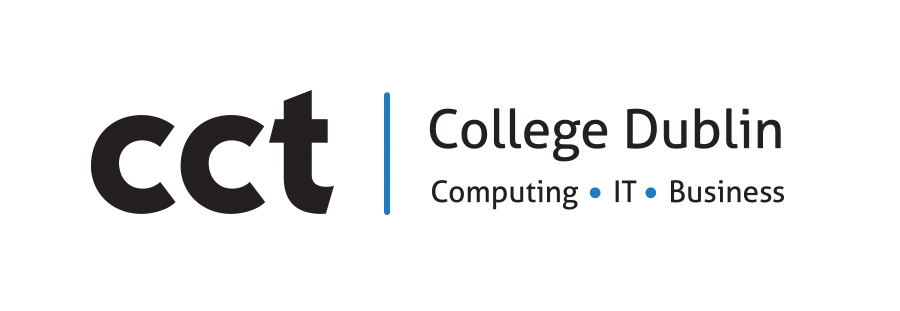

<div style="text-align: center;">
    <h1><u>Artificial Intelligence CA2</u></h1>
    <h3>Lecturer: David McQuaid</h3>
    <h3>Student Name: Danrlei da Silva Martins</h3>
    <h3>Student Number: 2020322</h3>
    <h3><a href="https://github.com/danrlei-martins-cct/AI_Lv8_CA2">GitHub Repository</a></h3>
</div>

***

## <u>Question 1</u>

<div style="text-align: justify;">
A puzzle has multiple ways of reaching the end solution. Fig. 1 shows a graph that represents all possible routes to the solution. The starting point of the game is represented by A, the solution is represented by S. The other points in the graph are possible intermediary stages.  
  
### (a) The graph in Fig. 1 is a visualisation of the problem. 

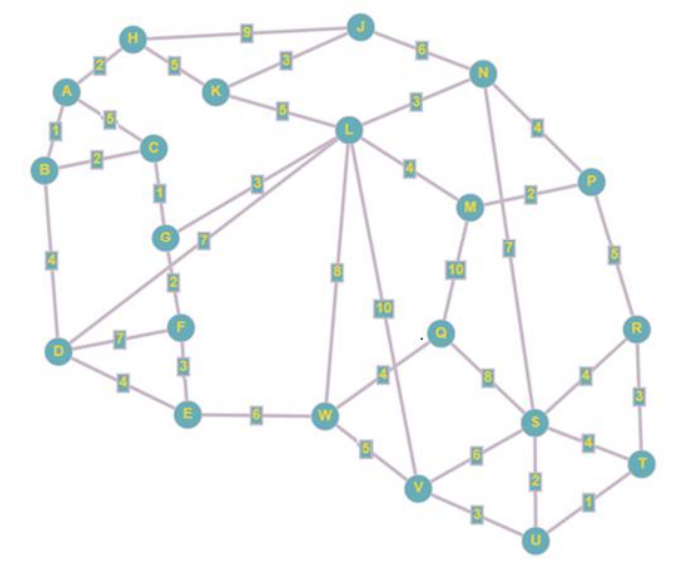  

</div>

<div style="text-align: justify;">
    <h3> (i) Identify the differences between a graph and a tree </h3><br>
In a formal sense, a **graph** consists of a set of vertices (V) and a set of edges (E). Each edge is represented by an unordered pair of vertices (vi, vj), which are elements of the vertex set V (Hamilton, 2020, p. 2). Particularly, a graph represents a collection of points and how they are interconnected (Wilson, 1996, p. 2). This fundamental principle in graph theory is often used to illustrate relationships between different entities or objects (Deo, 2016, p. 3).<br><br>
    A <b>tree</b> is a connected graph containing no cycles (Wilson, 1996, p. 43). In other words, it is a graph with only one path between each pair of vertices and has no loops or cycles (Deo, 2016, p. 45). A tree is a particular kind of graph with unique characteristics. Though not all graphs are trees, a graph is always a tree.

The main differences are in regards to:

- <b>Connectivity</b>  
    - Graphs can be connected at any degree (Deo, 2016).
    - Trees are never isolated. Any two vertices form a connected graph since a single path connects them (Gould, 2016).  
- <b>Cycles</b>
    - Cycles, or loops in the structure, are a possible feature of graphs (Wilson, 1996).
    - Trees have no cycles (Deo, 2016). Therefore, they are acyclic.
- <b>Number of Edges</b>
    - There is no limitation on the number of edges in a graph.
    - There is a fixed number of edges in a tree. It has precisely _n-1_ edges if it has _n_ vertices (Deo, 2016).
- <b>Rooted Structure</b>
    - Graphs may not have a single node that acts as a root. Any node might serve as the beginning point of a traversal, depending on the method or context being applied.
    - Trees often have a root node (e.g. rooted trees) from which all other nodes are reachable.
</div>

### (ii) Explain in detail how the graph is an abstraction of the problem

If a problem can be represented and examined as a graph structure, then the problem can be abstracted into a graph. Holte _et al._ (1996) proposed that solving a problem can be thought of as tracing a path in a graph between two specified nodes. Put another way, the problem can be conceptualized as a graph, in which the nodes stand for different problem states and the edges for changes between those states. Beamer III (2016) states that graph abstraction is a way to model the connections between objects.   

The graph presented in Fig. 1 **represents a problem** in which the objective is to identify the shortest route between point A (the initial point) and point S (the final point). Each point constitutes an intermediate stage, and the links between points represent the potential routes between those stages. The objective relates to **path-finding**, determining a graph's shortest path between two specified nodes (Holte _et al._, 1996).  

The graph abstraction offers a means of presenting the problem in a more structured and organized way, which can result in more effective and efficient problem solutions.

<div style="text-align: justify;">
    <h3>(iii) Identify the advantages of using a visualisation such as the one shown in Fig. 1 </h3><br>
    Graphs provide a <b>visual representation of the problem</b>. Visualization can be defined as <i>"the ability, the process and the product of creation, interpretation, use of and reflection upon pictures, images, diagrams, in our minds, on paper or with technological tools, with the purpose of depicting and communicating information, thinking about and developing previously unknown ideas and advancing understandings</i>." (Arcani, 2003, p. 26).
<br><br> Therefore, visualization helps us understand a problem better and plan for solving it (Piggott and Woodham, 2008). Furthermore, it makes it easier for problem solvers to understand the relationships between different states or stages. Other advantages include:
<br><br>
1. <b>Clarity</b>: Simplifies the problem into a set of nodes and edges, which makes it easier to comprehend and solve.<br>
2. <b>Path Exploration</b>: It allows us to explore and compare multiple paths visually. It is handy for path-finding problems, such as finding the shortest path in a network (Holte <i>et al.</i>, 1996).<br>
3. <b>Route Optimization</b>: Identifying the shortest path and evaluating alternative routes is easier.<br>
4. <b>Decision Support</b>: It helps make informed decisions about the path to take.
</div>

***

<h3>(b) Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation of each stage</h3>

In [1]:
# Import required libraries
import networkx as nx
import matplotlib.pyplot as plt
import heapq

In [2]:
# Graph data (nodes, edges and weights) based on Fig. 1
graph_data = {
    'A': {'B': 1, 'C': 5, 'H': 2},
    'B': {'C': 2, 'D': 4},
    'C': {'A': 5, 'B': 2, 'G': 1},
    'D': {'B': 4, 'E': 4, 'F': 7, 'L': 7},
    'E': {'D': 4, 'F': 3, 'W': 6},
    'F': {'D': 7, 'E': 3, 'G': 2},
    'G': {'C': 1, 'F': 2, 'L': 3},
    'H': {'A': 2, 'J': 9, 'K': 5},
    'J': {'H': 9, 'K': 3, 'N': 6},
    'K': {'H': 5, 'J': 3, 'L': 5},
    'L': {'D': 7, 'G': 3, 'K': 5, 'N': 3, 'M': 4, 'V': 10, 'W': 8},
    'M': {'L': 4, 'P': 2, 'Q': 10},
    'N': {'J': 6, 'L': 3, 'P': 4, 'S': 7},
    'P': {'M': 2, 'N': 4, 'R': 5},
    'Q': {'M': 10, 'S': 8, 'W': 4},
    'R': {'P': 5, 'S': 4, 'T': 3},
    'S': {'Q': 8, 'R': 4, 'T': 4, 'U': 2, 'V': 6},
    'T': {'R': 3, 'S': 4, 'U': 1},
    'U': {'S': 2, 'T': 1, 'V': 3},
    'V': {'L': 10, 'S': 6, 'U': 3, 'W': 5},
    'W': {'E': 6, 'L': 8, 'Q': 4, 'V': 5}
}

<h3>Creating graph of Fig. 1</h3>

In [3]:
# Create a graph using NetworkX
G = nx.Graph()

In [4]:
# Add nodes and edges to graph
for node, neighbours in graph_data.items():
    G.add_node(node)
    for neighbour, weight in neighbours.items():
        G.add_edge(node, neighbour, weight=weight)

In [5]:
# Define custom node positions to adjust according to Fig. 1
custom_node_positions = {
    'A': (0.1, 3),
    'B': (-0.4, 1),
    'C': (1.1, 2),
    'D': (-0.1, -4),
    'E': (1, -7),
    'F': (1.1, -4),
    'G': (1.1, -1.2),
    'H': (1, 5),
    'J': (4, 5),
    'K': (2.2, 3.4),
    'L': (3.8, 1.8),
    'M': (4.8, -1.5),
    'N': (5.3, 2.5),
    'P': (6.6, -1),
    'Q': (4.2, -4.5),
    'R': (6.8, -4),
    'S': (5.5, -6),
    'T': (7, -8.2),
    'U': (5.7, -10),
    'V': (4, -9),
    'W': (2.7, -7.6),
}

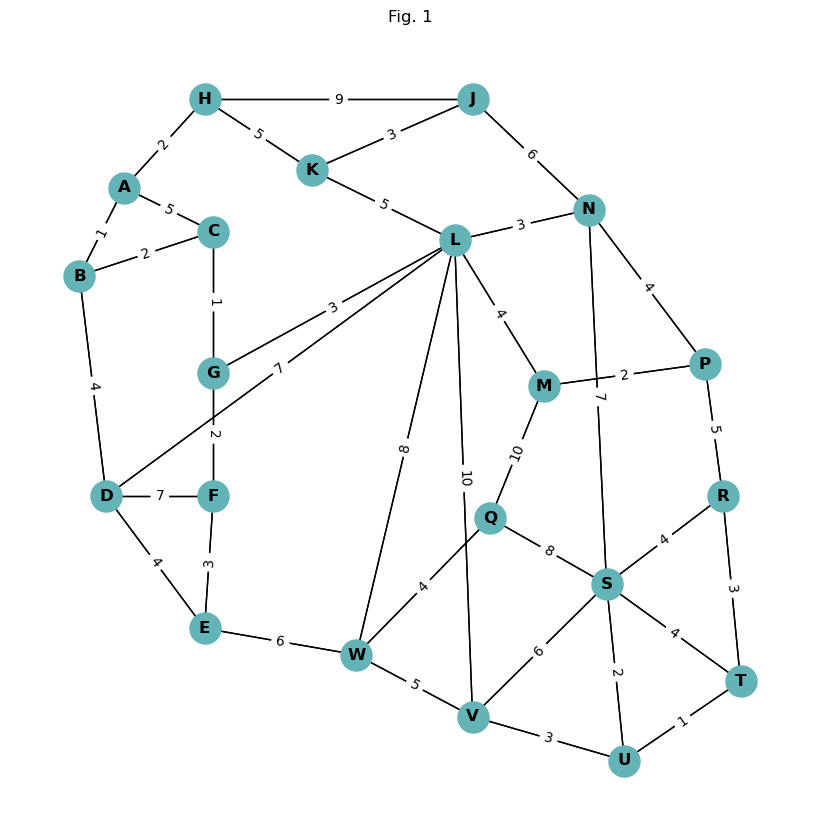

In [6]:
# Draw the graph to represent Fig. 1
plt.figure(figsize=(8, 8))
labels = nx.get_edge_attributes(G, 'weight')
pos = custom_node_positions

nx.draw(G, pos, with_labels=True, node_size=500, node_color='#64b3b7', font_weight='bold')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Fig. 1")
plt.axis("off")
plt.show();

<div style="text-align: justify;">
    <h3>Visualizing Dijkstra</h3><br>
Dijkstra's algorithm, a widely used method for <b>finding the shortest paths</b> from a single source vertex to all other vertices (Cormen, 2013). The algorithm begins from the source vertex, S, and builds a tree until it reaches every vertex that can be reached from S. In order to add vertices to the tree, they are added in terms of distance, starting with S and going up to the vertex nearest to S and so forth (Jena and Patro, 2018).<br><br>
The Dijkstra algorithm is a greedy approach that finds the optimal answer or the minimum outcome of the shortest path (Chakraborty, 2022). In the context of Fig. 1, the algorithm systematically determines the most efficient path from the graph's source node 'A' to the target node S. For this implementation, a priority queue was used as the chosen method. It is a queue which contains a collection of items that are waiting to be processed. Every item has a priority, and the item with the highest priority is the one that is selected when it comes time to make a decision (Jena and Patro, 2018).<br><br>

Here is a detailed explanation of what is happening at each stage in the <i>visualize_dijkstra</i> implementation:  

1. <b>Initialization</b>: The algorithm's first step is to set the initial distances. Starting from 'A,' the distance to itself is set to 0, while distances to all other nodes are initialized to infinity. This establishes the foundation for exploring and updating the shortest paths.
2. <b>Priority Queue</b>: The algorithm uses a priority queue (implemented as a heap queue) to select the vertex with the smallest known distance efficiently.
3. <b>Main Loop</b>: The algorithm enters a loop where it repeatedly selects the vertex with the smallest known distance from the priority queue. This vertex is marked as visited.
4. <b>Explore Neighbours</b>: For each neighbour of the current vertex, the algorithm calculates the distance from the starting vertex through the current vertex to the neighbour. This distance is obtained by adding the weight of the edge connecting the current vertex to its neighbour to the current vertex's distance.
5. <b>Update Distances</b>: If the newly calculated distance is smaller than the previously known distance to the neighbour, the algorithm updates the distance with the new value. The neighbour is then added to the priority queue with the updated distance. This step ensures that the algorithm explores shorter paths if they are discovered.
6. <b>Visualizing Current State</b>: After processing each vertex, the algorithm visualizes the current state of the graph. It uses networkx and matplotlib libraries to draw the graph and highlights the visited vertex in green. It also highlights the updated edge in red to indicate that a shorter path has been found.
7. <b>Check for Goal Vertex</b>: The algorithm checks if the current vertex is the goal vertex. If it is, the algorithm can stop since it has found the shortest path to the goal. Otherwise, it continues to the next iteration of the loop.
8. <b>Termination</b>: The algorithm terminates when no more vertices are in the priority queue or when the goal vertex has been reached. The algorithm has found the shortest path distances from the starting vertex to all other vertices in the graph.
9. <b>Return</b>: Finally, the algorithm returns the shortest path distances, which can be used to determine the shortest path from the starting vertex to any other vertex in the graph.  
  
<sub>Note: The implementation of the <i>visualize_dijkstra</i> function was based on the code provided by the Lecturer (McQuaid, 2023), with some added changes. </sub>

</div>

In [23]:
def visualize_dijkstra(graph, starting_vertex, goal_vertex):
    
    """
    Dijkstra algorithm for visualizing each stage of finding shortest path

    :param graph: The graph representation with node connections and edge costs.
    :param starting_vertex: The starting node.
    :param goal_vertex: The goal node to reach.
    :return: A plot for each stage of the algorithm as it runs by each node.
    """
    
    # Initialize distances
    distances = {vertex: float('infinity') for vertex in graph}
    distances[starting_vertex] = 0
    
    # Priority queue initialization
    pq = [(0, starting_vertex)]
    visited = set()
    
    step = 0

    while pq:
        # Get the current vertex and its distance
        current_distance, current_vertex = heapq.heappop(pq)

        # Skip if the current distance is greater than known distance or the vertex has already been visited
        if current_distance > distances[current_vertex] or current_vertex in visited:
            continue

        # Highlight the current vertex
        graph.nodes[current_vertex]['color'] = 'green'

        # Iterate over neighbours of the current vertex
        for neighbour in graph[current_vertex]:
            # Retrieve the weight of the edge
            weight = graph[current_vertex][neighbour]['weight']
            distance = current_distance + weight

            # Update distances if a shorter path is found
            if distance < distances[neighbour]:
                distances[neighbour] = distance
                heapq.heappush(pq, (distance, neighbour))
                # Highlight the updated edge
                graph[current_vertex][neighbour]['color'] = 'red'

        visited.add(current_vertex)

        step +=1
        
        # Visualize the current state
        pos = nx.get_node_attributes(graph, 'pos')
        edge_colors = [graph[u][v].get('color', 'black') for u, v in graph.edges]
        node_colors = [graph.nodes[n].get('color', '#64b3b7') for n in graph.nodes]
        edge_labels = {(u, v): graph[u][v]['weight'] for u, v in graph.edges}
        nx.draw(graph, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, font_weight='bold')
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
        plt.title(f"Current Node: {current_vertex}")
        plt.show()
        
        # Print the current state
        print(f"Distances: {distances}")
        print(f"\nVisited Nodes: {visited}\n")
        
        # Check if the current vertex is the goal vertex
        if current_vertex == goal_vertex:
            break
        
        shortest_path = nx.shortest_path(graph, source=starting_vertex, target=goal_vertex, weight='weight')

    return distances, shortest_path

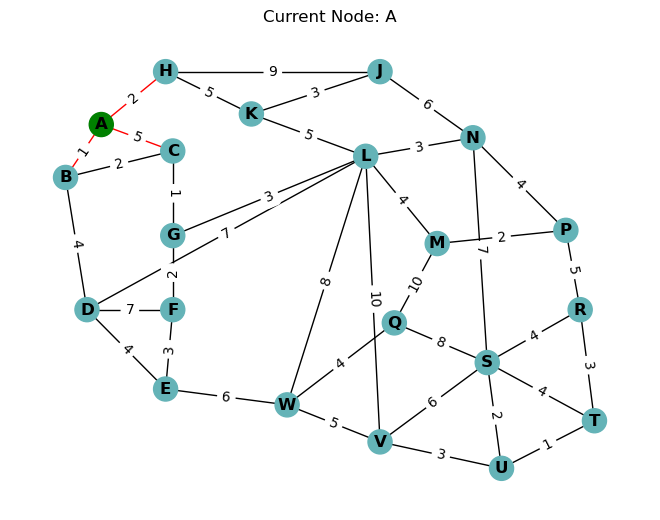

Distances: {'A': 0, 'B': 1, 'C': 5, 'D': inf, 'E': inf, 'F': inf, 'G': inf, 'H': 2, 'J': inf, 'K': inf, 'L': inf, 'M': inf, 'N': inf, 'P': inf, 'Q': inf, 'R': inf, 'S': inf, 'T': inf, 'U': inf, 'V': inf, 'W': inf}

Visited Nodes: {'A'}



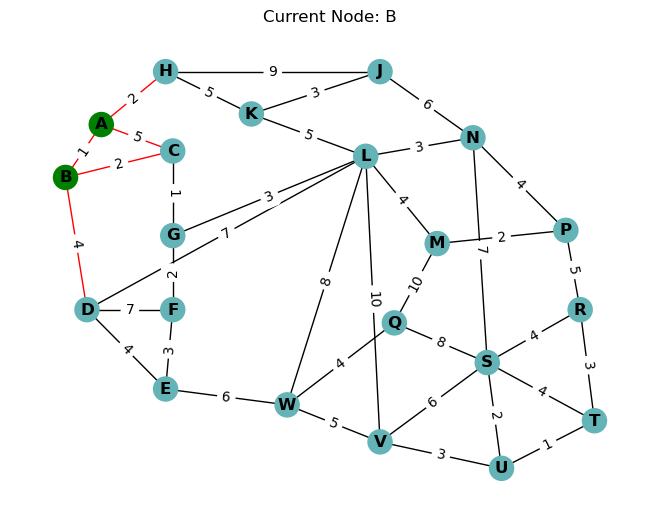

Distances: {'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': inf, 'F': inf, 'G': inf, 'H': 2, 'J': inf, 'K': inf, 'L': inf, 'M': inf, 'N': inf, 'P': inf, 'Q': inf, 'R': inf, 'S': inf, 'T': inf, 'U': inf, 'V': inf, 'W': inf}

Visited Nodes: {'A', 'B'}



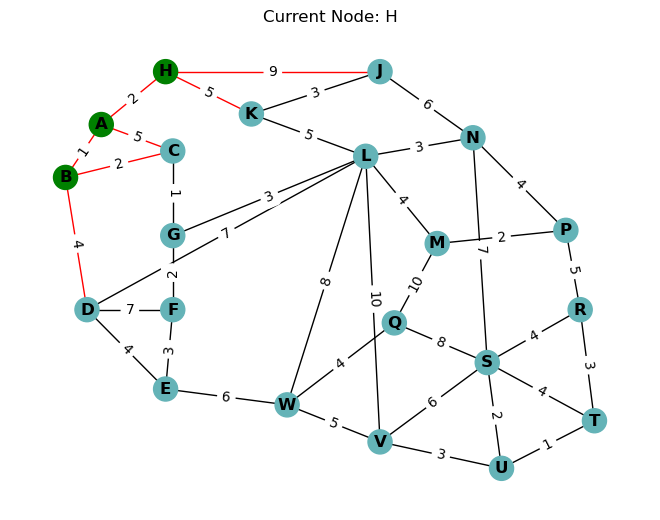

Distances: {'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': inf, 'F': inf, 'G': inf, 'H': 2, 'J': 11, 'K': 7, 'L': inf, 'M': inf, 'N': inf, 'P': inf, 'Q': inf, 'R': inf, 'S': inf, 'T': inf, 'U': inf, 'V': inf, 'W': inf}

Visited Nodes: {'A', 'B', 'H'}



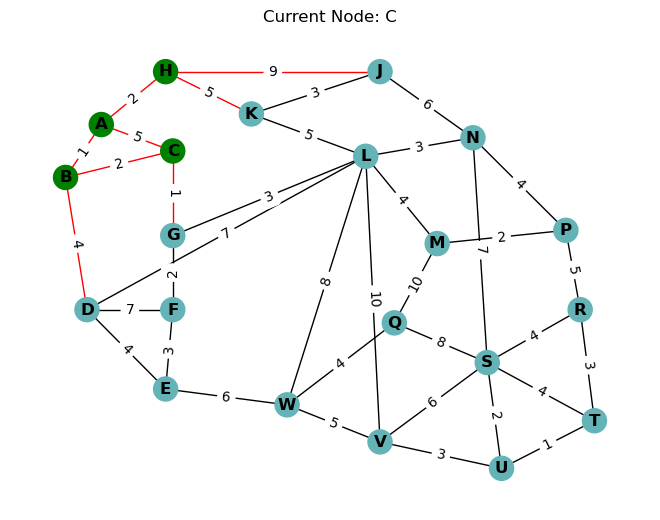

Distances: {'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': inf, 'F': inf, 'G': 4, 'H': 2, 'J': 11, 'K': 7, 'L': inf, 'M': inf, 'N': inf, 'P': inf, 'Q': inf, 'R': inf, 'S': inf, 'T': inf, 'U': inf, 'V': inf, 'W': inf}

Visited Nodes: {'A', 'C', 'B', 'H'}



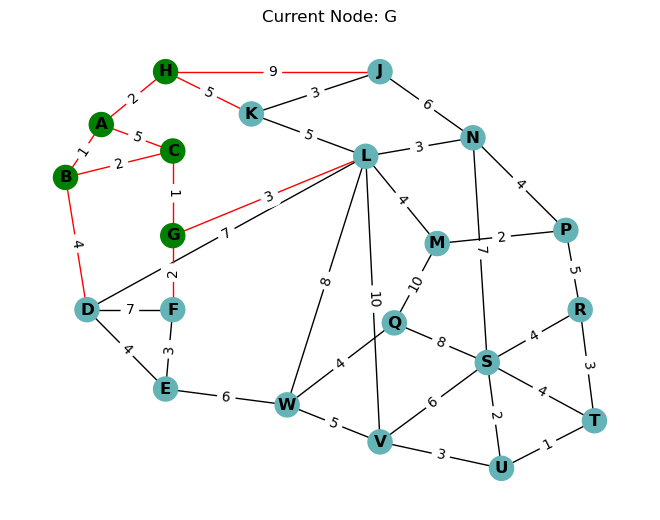

Distances: {'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': inf, 'F': 6, 'G': 4, 'H': 2, 'J': 11, 'K': 7, 'L': 7, 'M': inf, 'N': inf, 'P': inf, 'Q': inf, 'R': inf, 'S': inf, 'T': inf, 'U': inf, 'V': inf, 'W': inf}

Visited Nodes: {'A', 'C', 'B', 'G', 'H'}



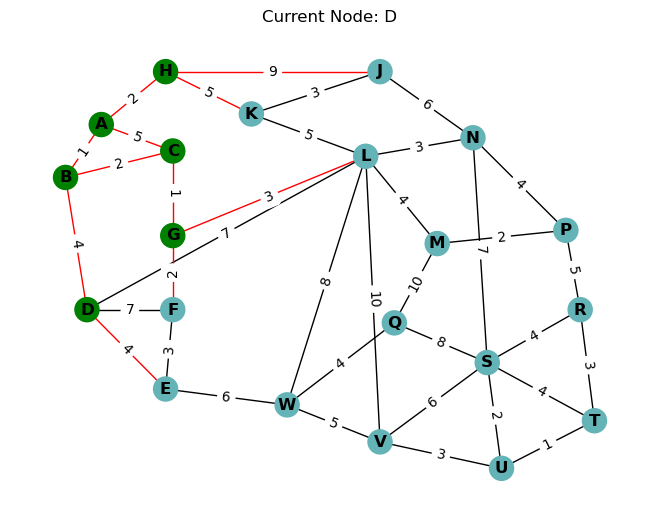

Distances: {'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': 9, 'F': 6, 'G': 4, 'H': 2, 'J': 11, 'K': 7, 'L': 7, 'M': inf, 'N': inf, 'P': inf, 'Q': inf, 'R': inf, 'S': inf, 'T': inf, 'U': inf, 'V': inf, 'W': inf}

Visited Nodes: {'A', 'D', 'C', 'B', 'G', 'H'}



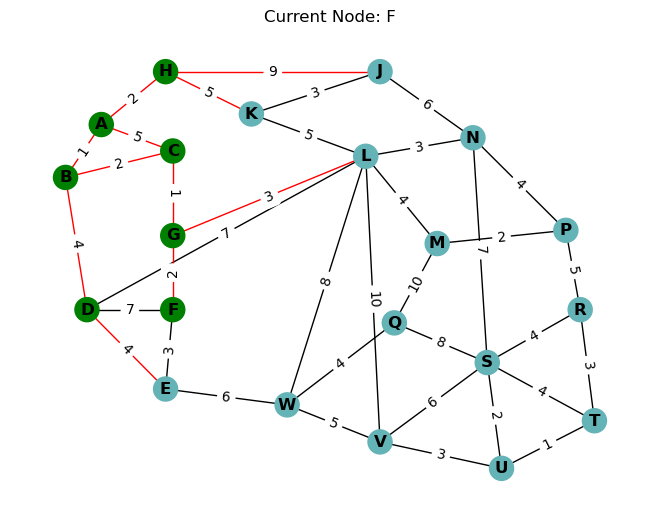

Distances: {'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': 9, 'F': 6, 'G': 4, 'H': 2, 'J': 11, 'K': 7, 'L': 7, 'M': inf, 'N': inf, 'P': inf, 'Q': inf, 'R': inf, 'S': inf, 'T': inf, 'U': inf, 'V': inf, 'W': inf}

Visited Nodes: {'A', 'D', 'C', 'F', 'B', 'G', 'H'}



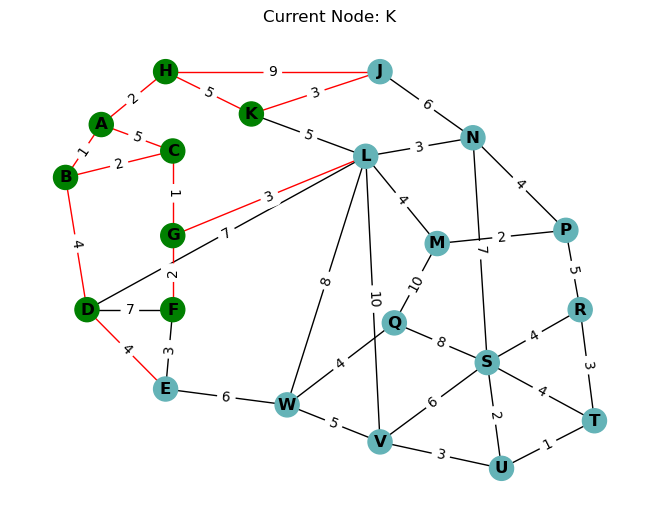

Distances: {'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': 9, 'F': 6, 'G': 4, 'H': 2, 'J': 10, 'K': 7, 'L': 7, 'M': inf, 'N': inf, 'P': inf, 'Q': inf, 'R': inf, 'S': inf, 'T': inf, 'U': inf, 'V': inf, 'W': inf}

Visited Nodes: {'A', 'D', 'K', 'C', 'F', 'B', 'G', 'H'}



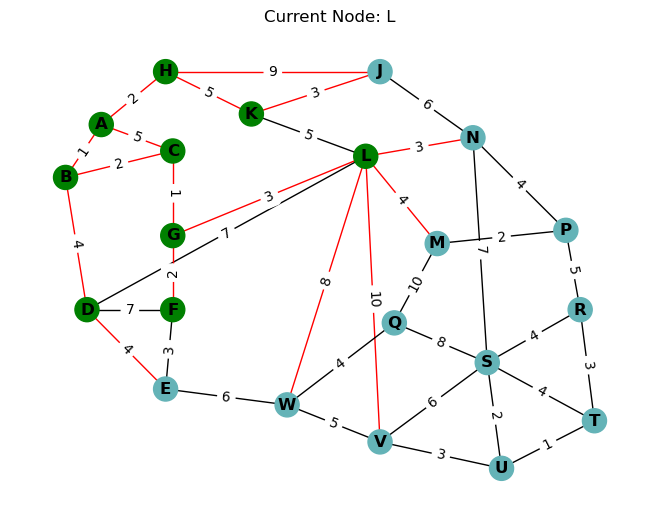

Distances: {'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': 9, 'F': 6, 'G': 4, 'H': 2, 'J': 10, 'K': 7, 'L': 7, 'M': 11, 'N': 10, 'P': inf, 'Q': inf, 'R': inf, 'S': inf, 'T': inf, 'U': inf, 'V': 17, 'W': 15}

Visited Nodes: {'A', 'D', 'K', 'C', 'F', 'L', 'B', 'G', 'H'}



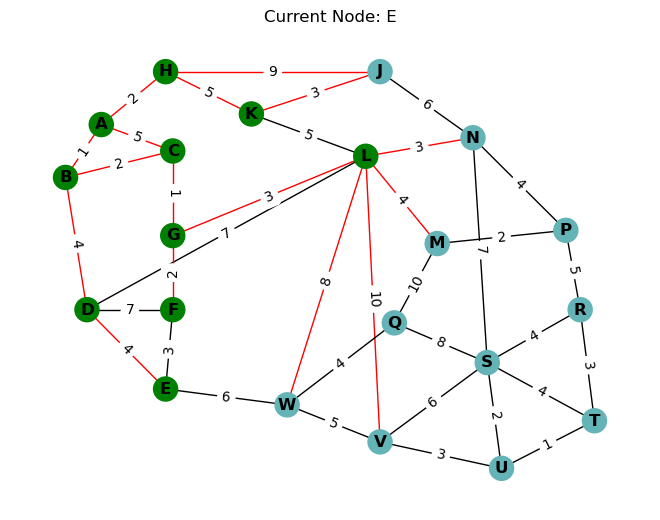

Distances: {'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': 9, 'F': 6, 'G': 4, 'H': 2, 'J': 10, 'K': 7, 'L': 7, 'M': 11, 'N': 10, 'P': inf, 'Q': inf, 'R': inf, 'S': inf, 'T': inf, 'U': inf, 'V': 17, 'W': 15}

Visited Nodes: {'A', 'D', 'K', 'E', 'C', 'F', 'L', 'B', 'G', 'H'}



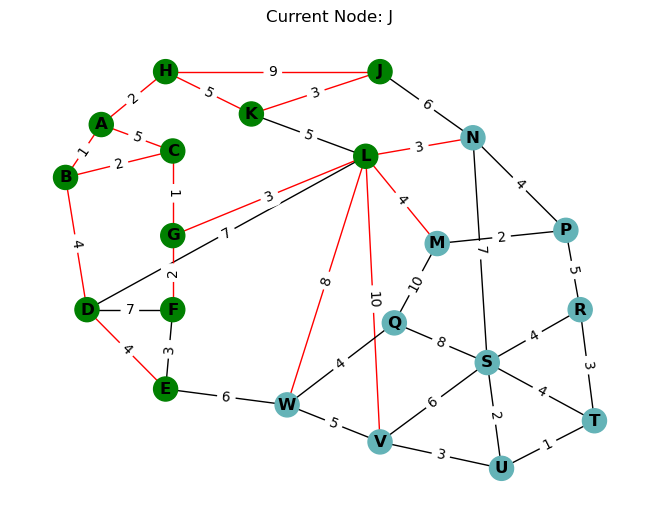

Distances: {'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': 9, 'F': 6, 'G': 4, 'H': 2, 'J': 10, 'K': 7, 'L': 7, 'M': 11, 'N': 10, 'P': inf, 'Q': inf, 'R': inf, 'S': inf, 'T': inf, 'U': inf, 'V': 17, 'W': 15}

Visited Nodes: {'A', 'D', 'K', 'E', 'C', 'J', 'F', 'L', 'B', 'G', 'H'}



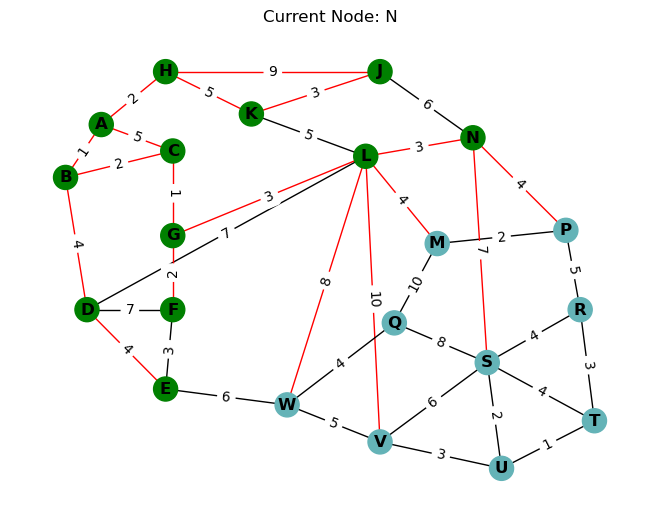

Distances: {'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': 9, 'F': 6, 'G': 4, 'H': 2, 'J': 10, 'K': 7, 'L': 7, 'M': 11, 'N': 10, 'P': 14, 'Q': inf, 'R': inf, 'S': 17, 'T': inf, 'U': inf, 'V': 17, 'W': 15}

Visited Nodes: {'A', 'D', 'K', 'E', 'C', 'J', 'F', 'N', 'L', 'B', 'G', 'H'}



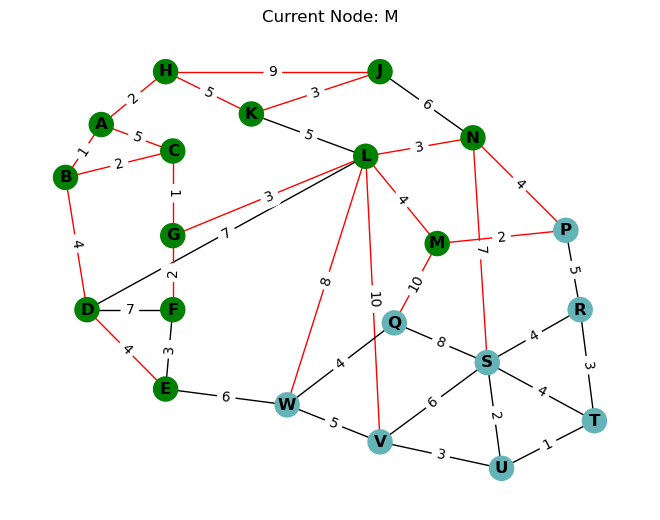

Distances: {'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': 9, 'F': 6, 'G': 4, 'H': 2, 'J': 10, 'K': 7, 'L': 7, 'M': 11, 'N': 10, 'P': 13, 'Q': 21, 'R': inf, 'S': 17, 'T': inf, 'U': inf, 'V': 17, 'W': 15}

Visited Nodes: {'A', 'M', 'D', 'K', 'E', 'C', 'J', 'F', 'N', 'L', 'B', 'G', 'H'}



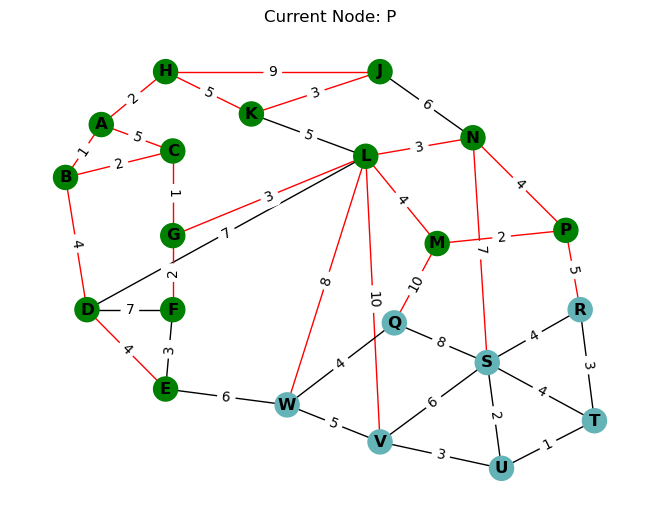

Distances: {'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': 9, 'F': 6, 'G': 4, 'H': 2, 'J': 10, 'K': 7, 'L': 7, 'M': 11, 'N': 10, 'P': 13, 'Q': 21, 'R': 18, 'S': 17, 'T': inf, 'U': inf, 'V': 17, 'W': 15}

Visited Nodes: {'A', 'M', 'D', 'K', 'E', 'C', 'J', 'F', 'N', 'P', 'L', 'B', 'G', 'H'}



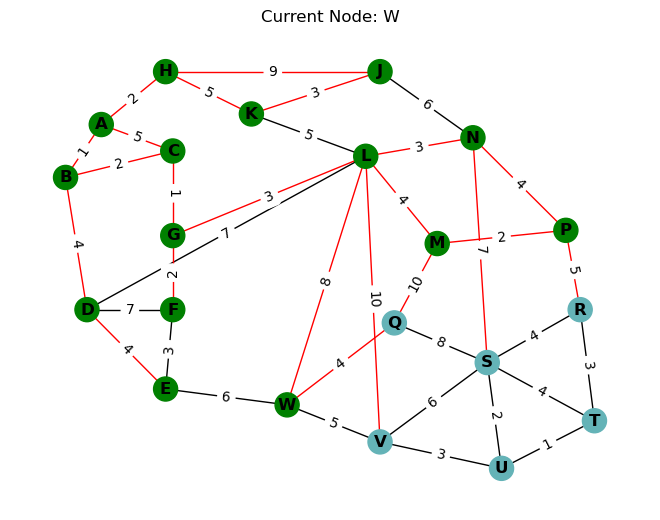

Distances: {'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': 9, 'F': 6, 'G': 4, 'H': 2, 'J': 10, 'K': 7, 'L': 7, 'M': 11, 'N': 10, 'P': 13, 'Q': 19, 'R': 18, 'S': 17, 'T': inf, 'U': inf, 'V': 17, 'W': 15}

Visited Nodes: {'A', 'M', 'D', 'K', 'E', 'C', 'J', 'F', 'N', 'P', 'W', 'L', 'B', 'G', 'H'}



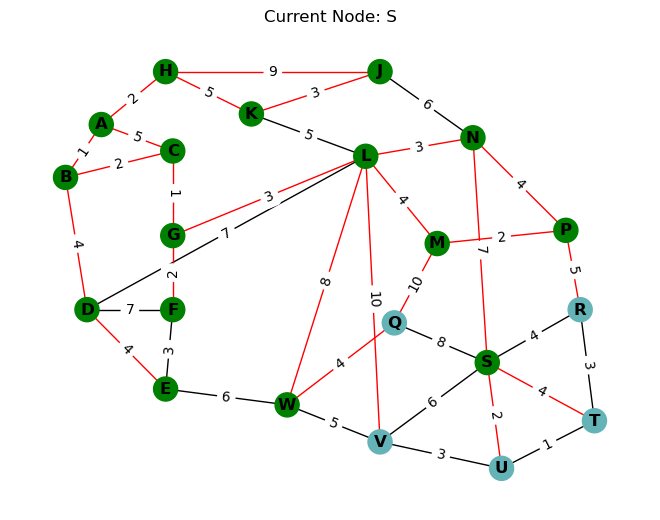

Distances: {'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': 9, 'F': 6, 'G': 4, 'H': 2, 'J': 10, 'K': 7, 'L': 7, 'M': 11, 'N': 10, 'P': 13, 'Q': 19, 'R': 18, 'S': 17, 'T': 21, 'U': 19, 'V': 17, 'W': 15}

Visited Nodes: {'A', 'M', 'D', 'S', 'K', 'E', 'C', 'J', 'F', 'N', 'P', 'W', 'L', 'B', 'G', 'H'}



In [24]:
# Create graphs to visualize each step
G_custom = nx.Graph()

for node, pos in custom_node_positions.items():
    G_custom.add_node(node, pos=pos)

for node, neighbours in graph_data.items():
    for neighbour, weight in neighbours.items():
        G_custom.add_edge(node, neighbour, weight=weight)

# Print visualizations for the custom graph
distances, shortest_path = visualize_dijkstra(G_custom, 'A', 'S')

In [9]:
# Print all distances
print(distances)

# Print the shortest path from A to S
print("\nShortest Path from 'A' to 'S':", shortest_path)

# Print the 'cost' of the shortest path
shortest_distance_A_to_S = distances['S']
print(f"\nThe shortest distance (cost) from 'A' to 'S' is: {shortest_distance_A_to_S}")

{'A': 0, 'B': 1, 'C': 3, 'D': 5, 'E': 9, 'F': 6, 'G': 4, 'H': 2, 'J': 10, 'K': 7, 'L': 7, 'M': 11, 'N': 10, 'P': 13, 'Q': 19, 'R': 18, 'S': 17, 'T': 21, 'U': 19, 'V': 17, 'W': 15}

Shortest Path from 'A' to 'S': ['A', 'B', 'C', 'G', 'L', 'N', 'S']

The shortest distance (cost) from 'A' to 'S' is: 17


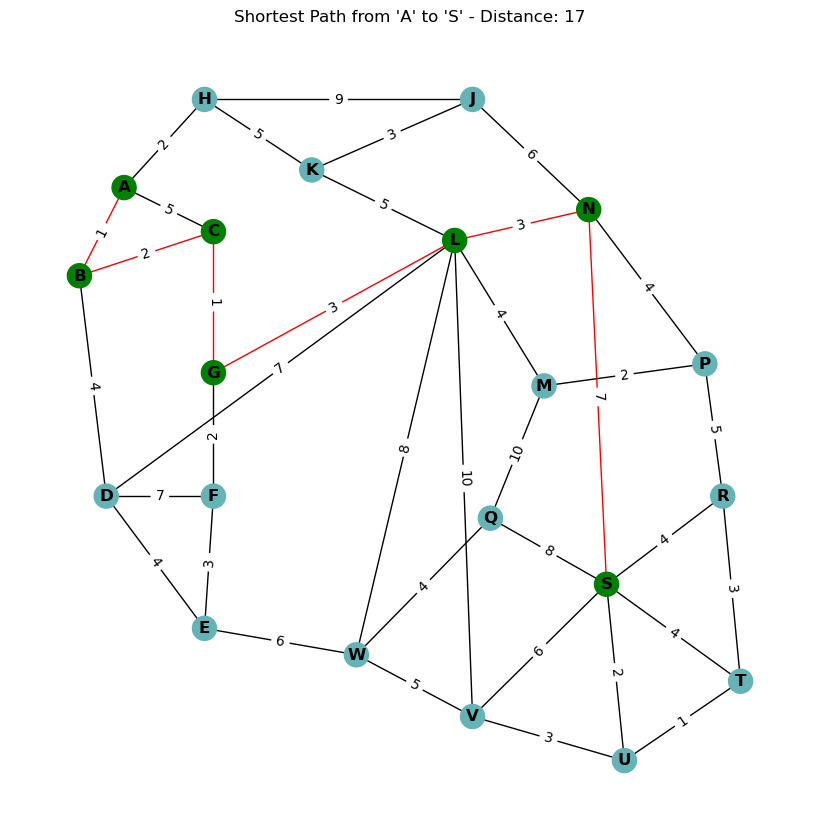

In [10]:
# Plot shortest path

# Extract nodes and edges along the shortest path
shortest_path_nodes = set(shortest_path)
shortest_path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]

# Set attributes for nodes and edges along the shortest path
for node in G_custom.nodes:
    G_custom.nodes[node]['color'] = 'green' if node in shortest_path_nodes else '#64b3b7'

for edge in G_custom.edges:
    G_custom[edge[0]][edge[1]]['color'] = 'red' if edge in shortest_path_edges else 'black'

# Visualize the graph
pos = nx.get_node_attributes(G_custom, 'pos')
edge_colors = [G_custom[u][v].get('color', 'black') for u, v in G_custom.edges]
node_colors = [G_custom.nodes[n].get('color', '#64b3b7') for n in G_custom.nodes]
edge_labels = {(u, v): G_custom[u][v]['weight'] for u, v in G_custom.edges}

plt.figure(figsize=(8, 8))
nx.draw(G_custom, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, font_weight='bold')
nx.draw_networkx_edge_labels(G_custom, pos, edge_labels=edge_labels)
plt.title("Shortest Path from 'A' to 'S' - Distance: 17")
plt.axis("off")
plt.show();

***

<div style="text-align: justify;">
<h2>Question 2</h2><br>
The creator of the puzzle has been told that the A* algorithm is more efficient at finding the shortest path because it uses <b>heuristics</b>. Compare the performance of Dijkstra’s algorithm and the A* search algorithm, referring to heuristics, to find the shortest path to the problem by implementing both algorithms programmatically and comparing the solutions generated in Mark-down. Refer to the complexity of the algorithms and <b>compare the actual time</b> it takes for the solutions to be processed.
</div>

<div style="text-align: justify;">
<h3>Dijkstra's Algorithm</h3><br>
The implementation efficiently selects the vertex with the smallest distance by using a priority queue (min-heap). Regarding the time complexity of the code, these are the factors:

- <b>Initialization</b>: Initializing distances and previous vertices for all vertices in the graph takes O(V) time (Bradfield, n.d.).
- <b>Priority Queue Operations</b>: The main loop involves operations on the priority queue:
    - Heap Initialization: The priority queue is initialized with the starting vertex, taking O(Log V) time (Dartmouth, 2014).
    - Main Loop: The loop runs until the priority queue is empty, and in each iteration, there are heap operations (pop and push), each taking O(Log V) time. Since the loop can iterate over all edges and vertices, the total time complexity for heap operations is O((V + E) log V) time.
- <b>Reconstruction of Shortest Path</b>: Reconstructing the shortest path from the previous vertices takes O(V) time.

Considering the above factors, the provided implementation using a heap data structure total time complexity is <b>O((V + E) log V)</b>. (Dartmouth, 2014).  

<sub>Note: The implementation of the <i>dijkstra</i> function was based on the code provided by the Lecturer (McQuaid, 2023), with some added changes.</sub>
</div>

In [11]:
def dijkstra(graph, start, goal):
    
    """
    Dijkstra algorithm for shortest path

    :param graph: The graph representation with node connections and edge costs.
    :param start: The starting node.
    :param goal: The goal node to reach.
    :return: The path from start to goal
    """
    # Initialize distances and previous vertices
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    previous = {vertex: None for vertex in graph}
    
    # Priority queue initialization
    pq = [(0, start)]
    visited = set()
    while pq:
        # Get the current vertex and its distance
        current_distance, current_vertex = heapq.heappop(pq)
        
        # Skip if the current distance is greater than the known distance or the vertex has already been visited
        if current_distance > distances[current_vertex] or current_vertex in visited:
            continue
        
        # Check if the current vertex is in the graph
        if current_vertex not in graph:
            continue

        # Iterate over neighbors of the current vertex
        for neighbour, weight in graph[current_vertex].items():
            distance = current_distance + weight
            # Update distances and previous vertices if a shorter path is found
            if distance < distances[neighbour]:
                distances[neighbour] = distance
                previous[neighbour] = current_vertex
                heapq.heappush(pq, (distance, neighbour))
        visited.add(current_vertex)
        
        # Check if the current vertex is the goal vertex
        if current_vertex == goal:
            break
    
    # Reconstruct the shortest path from the previous vertices
    path = []
    current_vertex = goal
    while current_vertex is not None:
        path.append(current_vertex)
        current_vertex = previous[current_vertex]
    return path[::-1]

In [12]:
shortest_path = dijkstra(graph_data, 'A', 'S')
print(f"Shortest path from A to S: {shortest_path}")

Shortest path from A to S: ['A', 'B', 'C', 'G', 'L', 'N', 'S']


<div style="text-align: justify;">
    <h3>A* Algorithm</h3><br>
    An improvement on the shortest path algorithm, the A* algorithm focuses on the search of the goal instead of just examining nodes based on their distance from the starting point. Just like Dijkstra's, the objective of A* is to discover the shortest possible path in a graph between two points (from a start node to a goal node). <br><br>
    The main difference is that A* uses an extra parameter called <b>heuristics</b>, which guides the next node, which will be expanded (Porbasas Flejoles, 2019). In other words, the heuristic value controls the behaviour of the algorithm. Naturally, it is only sometimes possible to create heuristic functions that are exactly correct. However, a heuristic function that is only roughly correct can still significantly enhance search performance (Cornell University, 2007). <br><br> 
    The <b> Euclidian Distance</b> method was chosen for the algorithm implementation to create suitable heuristics. The Euclidian distance provides a straight-line estimate from the current node to the goal node. The Euclidean distance formula says: $d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$ (Patel, 2023). Because of the graph's nature and its custom node positions, the Euclidean distance heuristic is suitable due to the arbitrary node positions. Additionally, this method ensures it can never overestimate a distance to the goal vertex (Cornell University, 2007). This admissibility guarantees that the path taken is optimal when the search first reaches the goal vertex. <br><br>
    Regarding the A* implementation, the algorithm also uses a priority queue to keep track of the nodes that need to be explored and a set to keep track of the nodes that have already been explored. It also uses a dictionary to store the current known distances from the start node to each node and another dictionary to reconstruct the path once the goal node is reached.<br><br>
    The function's main loop continues until there are no more nodes in the open set. Each iteration selects the node with the lowest cost from the priority queue, adds it to the closed set, and explores its neighbours. If a neighbour has already been explored, it skips it. Otherwise, it calculates the tentative cost to reach the neighbour and updates the scores and priority queue if it is less than the known cost to reach the neighbour. If the goal node is reached, the function reconstructs and returns the path. If no path is found, it returns a message indicating so.<br><br>
    Regarding the time complexity, it is critical to note that the heuristics precision and quality highly influences the algorithm's time complexity. The complexity decreases as fewer nodes must be visited due to an improved heuristic function. (Cox, 2020). Like on Dijkstra's, the heap operations are the dominant factor, and the heap operations inside the main loop dominate the overall time complexity.<br>
    <ul>
        <li>Initializing distances = O(V).</li>
        <li>Heap operations inside the main loop = O(log V) (Python, 2023).
     <li>Exploring neighbours = O(E).
    </ul>
    Finally, the algorithm's overall time complexity is <b>O((V+E) log V).</b>
</div>

In [13]:
import math

In [14]:
def euclidean_distance_heuristic(current_node, goal_node, node_positions):
    
    """
    Calculates the Euclidean distance between a current node and a goal node.

    :param current_node: The current node in consideration.
    :param goal_node: The goal node to measure the distance to.
    :param node_positions: Dictionary containing the positions of nodes.
    :return: The Euclidean distance between current_node and goal_node.
    """
    
    # Extract positions of current and goal nodes
    x_current, y_current = node_positions[current_node]
    x_goal, y_goal = node_positions[goal_node]

    # Calculate Euclidean distance
    distance = math.sqrt((x_goal - x_current)**2 + (y_goal - y_current)**2)

    return distance

In [15]:
def heuristics(graph, goal_node, node_positions):
    
    """
    Generates heuristic values for each node in the graph based on Euclidean distance to the goal node

    :param graph: The graph representation with node connections and edge costs.
    :param goal_node: The goal node to measure distances to.
    :param node_positions: Dictionary containing the positions of nodes.
    :return: Dictionary with heuristic values for each node.
    """
    
    heuristics = {}

    for current_node in graph:
        heuristic_value = euclidean_distance_heuristic(current_node, goal_node, node_positions)
        heuristics[current_node] = heuristic_value

    return heuristics

In [16]:
astar_heuristics = heuristics(graph_data, 'S', custom_node_positions)

astar_heuristics

{'A': 10.49571341072154,
 'B': 9.154780172128657,
 'C': 9.130169768410662,
 'D': 5.946427498927402,
 'E': 4.6097722286464435,
 'F': 4.833218389437829,
 'G': 6.511528238439883,
 'H': 11.884864324004713,
 'J': 11.10180165558726,
 'K': 9.962429422585638,
 'L': 7.983107164506812,
 'M': 4.5541190146942805,
 'N': 8.50235261559999,
 'P': 5.119570294468081,
 'Q': 1.9849433241279206,
 'R': 2.3853720883753127,
 'S': 0.0,
 'T': 2.662705391138869,
 'U': 4.004996878900157,
 'V': 3.3541019662496847,
 'W': 3.2249030993194197}

In [17]:
def astar(graph, start, goal, heuristics):
    
    """
    A* algorithm for shortest path

    :param graph: The graph representation with node connections and edge costs.
    :param start: The starting node.
    :param goal: The goal node to reach.
    :param heuristics: Heuristic values for each node to estimate the cost to reach the goal.
    :return: The path from start to goal if found, else None.
    """

    # Priority queue to track nodes
    # Initialized with a tuple containing the heuristic value of the start node and the start node itself
    open_set = [(heuristics[start], start)]
    
    # Set to track explored nodes
    closed_set = set()
    
    # Dictionary to store the current known distances from the start node to each node
    # Initialized with infinity for all nodes except the start node, which is set to 0
    current_known_distances = {node: float('inf') for node in graph}
    current_known_distances[start] = 0
    
    # Dictionary to reconstruct the path
    path = {} 

    # Main loop: continue while there are nodes in the open_set
    while open_set:
        
        # Select node with lowest cost from priority queue
        current_cost, current_node = heapq.heappop(open_set)

        # Goal check
        if current_node == goal:
            # Reconstruct the path if the goal is reached
            path_nodes = [current_node]
            while current_node in path:
                current_node = path[current_node]
                path_nodes.append(current_node)
            return path_nodes[::-1]

        # Add current node to set of explored nodes
        closed_set.add(current_node)

        # Explore neighbours
        for neighbour, edge_cost in graph[current_node].items():
            # If the node was already explored, continue
            if neighbour in closed_set:
                continue
            # If not, calculate a tentative cost to reach the neighbour
            current_tentative_distance = current_known_distances[current_node] + edge_cost
            
            # If the tentative cost is less than the known cost to reach the neighbour
            # Update scores and priority queue 
            if current_tentative_distance < current_known_distances[neighbour]:
                current_known_distances[neighbour] = current_tentative_distance
                priority = current_tentative_distance + heuristics[neighbour]
                heapq.heappush(open_set, (priority, neighbour))
                path[neighbour] = current_node
    
    # No path found
    return ("Sorry, no path was found. Please try again with a different node!")

In [18]:
a_star_shortest_path = astar(graph_data, 'A', 'S', astar_heuristics)

print(f"A* - Shortest Path from 'A' to 'S': {a_star_shortest_path}")

A* - Shortest Path from 'A' to 'S': ['A', 'B', 'C', 'G', 'L', 'N', 'S']


<div style="text-align: justify;">
<h3>Actual Processing Time</h3><br>
    The in-built Python library <b>timeit</b> was used to compare the performance of both algorithms. This library enables us to benchmark each algorithm to measure the elapsed time for each over a specified number of tests (note.nkmk.me., 2023). <br><br>
    Timeit, recommended for measuring the execution time of relatively small code snippets in Python (Python, 2023), is a suitable choice for benchmarking algorithms. Increasing the number of tests to 5000 adds robustness to the benchmark results, providing a more reliable assessment of the algorithms' performance.<br><br>
    On a positive note, both algorithms' time elapsed remained relatively quick. The minor time differences persisted on many tries, indicating the efficiency of both algorithms for the given graph and problem size. Regarding the performance findings, the <b>A* algorithm was generally faster</b> than Dijkstra in most tests. Occasionally, the Dijkstra algorithm runs slightly faster, which can happen due to the heuristics implemented needing to be more accurate.<br><br>
    In the worst scenario, the A* algorithm will never be able to outperform Dijkstra in terms of general analysis until it explores the entire neighborhood of nodes. Therefore, the performance truly depends on the quality of the heuristic function.
</div>

In [19]:
# Import library
import timeit

In [20]:
# Number of times that timeit will benchmark each algorithm
num_tests = 5000

In [21]:
# Benchmarking Dijkstra's Algorithm
def benchmark_dijkstra():
    return timeit.timeit(lambda: dijkstra(graph_data, 'A', 'S'), number=num_tests)

# Benchmarking A* Algorithm
def benchmark_astar():
    return timeit.timeit(lambda: astar(graph_data, 'A', 'S', astar_heuristics), number=num_tests)

In [22]:
# Run benchmarks
elapsed_time_dijkstra = benchmark_dijkstra()
elapsed_time_astar = benchmark_astar()

# Print results with formatted times
print(f"Elapsed time for Dijkstra's: {elapsed_time_dijkstra:.6f} seconds")
print(f"Elapsed time for A*: {elapsed_time_astar:.6f} seconds")

Elapsed time for Dijkstra's: 0.207906 seconds
Elapsed time for A*: 0.179388 seconds


***

## References
Arcavi, A. (2003). _The role of visual representations in the learning of mathematics_. Educational Studies in Mathematics, [online] 52, pp.215–241. doi:https://doi.org/10.1023/A:1024312321077  (Accessed: 08 November 2023).  
Beamer III, S. (2016). _Understanding and Improving Graph Algorithm Performance_. University of California, Berkeley. [Dissertation] pp.5–6. Available at: https://www2.eecs.berkeley.edu/Pubs/TechRpts/2016/EECS-2016-153.html (Accessed 7 November 2023).  
Bradfield (n.d.). _Shortest Path with Dijkstra’s Algorithm_. Bradfield School of Computer Science [online] Available at: https://bradfieldcs.com/algos/graphs/dijkstras-algorithm/. (Accessed 18 November 2023).  
Chakraborty, S. (2022). _A Guide to Design and Analysis of Algorithms_. New York: Nova (Computer Science, Technology and Applications Ser). Available at: https://search.ebscohost.com/login.aspx?direct=true&db=e250xww&AN=3419736&site=eds-live&scope=site (Accessed: 13 November 2023).  
Cormen, T.H. (2013). _Algorithms Unlocked_. Cambridge, Massachusetts: The Mit Press. [online] Available at: https://search.ebscohost.com/login.aspx?direct=true&db=e250xww&AN=548168&site=eds-live&scope=site (Accessed: 9 November 2023).  
Cornell University (2007). _Recitation 26: A* search - Data Structures and Functional Programming_. [online] www.cs.cornell.edu. Available at: https://www.cs.cornell.edu/courses/cs312/2007sp/recitations/rec26.html (Accessed 15 November 2023).  
Cox, G. (2020). _A* Pathfinding Algorithm_ | Baeldung on Computer Science. [online] www.baeldung.com. Available at: https://www.baeldung.com/cs/a-star-algorithm. (Accessed 18 November 2023).  
Dartmouth (2014). _Lecture 20, May 9 - Dijkstra's algorithm_. Computer Science 10: Spring 2014. Available at: https://www.cs.dartmouth.edu/~thc/cs10/lectures/0509/0509.html. (Accessed 18 November 2023).  
Deo, N. (2016) _Graph Theory: With Applications to Engineering & Computer Science_. Mineola, New York: Dover Publications. Available at: https://www.shahucollegelatur.org.in/Department/Studymaterial/sci/it/BCS/FY/book.pdf (Accessed: 04 November 2023).   
Gould, R. (2012) _Graph Theory_. Mineola, New York: Dover Publications.  
Hamilton, W.L. (2020) _Graph Representation Learning_. Morgan & Claypool Publishers. Available at: https://www.cs.mcgill.ca/~wlh/grl_book/files/GRL_Book.pdf (Accessed: 05 November 2023).  
Holte, R.C., Mkadmi, T., Zimmer, R.M. and MacDonald, A.J. (1996). _Speeding up problem-solving by abstraction: a graph oriented approach_. Artificial Intelligence, 85(1-2), pp.321–361. doi:https://doi.org/10.1016/0004-3702(95)00111-5. (Accessed: 07 November 2023).  
Jena, S.R. and Patro, S. (2018). _Design and Analysis of Algorithms_. University Science Press, Laxmi Publications, New Delhi. [online] Available at: https://search.ebscohost.com/login.aspx?direct=true&db=e250xww&AN=3028805&site=eds-live&scope=site (Accessed: 9 November 2023).  
Matplotlib (2023). _Matplotlib: Python plotting — Matplotlib 3.1.1 documentation_. [online] Available at: https://matplotlib.org/. (Accessed: 09 November 2023).  
McQuaid, D. (2023). _Dijkstra’s algorithm_. Artificial Intelligence, CCT College Dublin [Source Code] Available at: https://moodle.cct.ie/mod/resource/view.php?id=143304 (Accessed: 07 November 2023).  
note.nkmk.me. (2023). _Measure execution time with timeit in Python_ [online] Available at: https://note.nkmk.me/en/python-timeit-measure/. (Accessed: 16 November 2023).  
Patel, A. (2023). _Heuristics_. Stanford University - Computer Science Department [online] Available at: https://theory.stanford.edu/~amitp/GameProgramming/Heuristics.html. (Accessed: 15 November 2023).  
Porbasas Flejoles, R. (2019) _Introduction to Search Algorithms_. Ashland: Arcler Press. Available at: https://search.ebscohost.com/login.aspx?direct=true&db=e250xww&AN=2013913&site=eds-live&scope=site (Accessed: 14 November 2023).  
Python (2023). _heapq — Heap queue algorithm_ — Python 3.10.0 documentation. [online] Available at: https://docs.python.org/3/library/heapq.html. (Accessed: 18 November 2023).  
Python (2023). _timeit — Measure execution time of small code snippets_ — Python 3.9.0 documentation. [online] Available at: https://docs.python.org/3/library/timeit.html. (Accessed: 14 November 2023).    
NetworkX (2023). _Introduction — NetworkX 2.8.2 documentation_. [online] Available at: https://networkx.org/documentation/stable/reference/introduction.html. (Accessed: 09 November 2023).  
Piggott , J. and Woodham, L. (2008). _Thinking Through, and By, Visualising_. Mathematics Teaching: Association of Teachers of Mathematics, [online] 207. Available at: https://nrich.maths.org/6447 (Accessed: 08 November 2023).  
Wilson, R.J. (1996) _Introduction to Graph Theory_. 4th ed. Harlow, United Kingdom: Addison Wesley. Available at: https://www.maths.ed.ac.uk/~v1ranick/papers/wilsongraph.pdf (Accessed: 03 November 2023).   